In [1]:

import sys, os

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%run ../load_magic/storage.py
%run ../load_magic/dataframes.py
%pprint
%matplotlib inline
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

import re
from math import cos, sin, pi, sqrt, atan
import numpy as np
from spiral_utils import StraussHoweUtilities

s = Storage()
shu = StraussHoweUtilities(s=s)
%who

Pretty printing has been turned OFF
FILEPATH_REGEX	 Path	 Storage	 StraussHoweUtilities	 URL_REGEX	 bs	 cos	 csv	 example_iterrows	 
get_column_descriptions	 get_max_rsquared_adj	 get_page_soup	 get_page_tables	 get_wiki_tables	 io	 math	 np	 os	 
pd	 pi	 pickle	 plt	 random	 re	 s	 set_matplotlib_formats	 shu	 
sin	 sm	 sns	 stats	 sys	 urllib	 urlretrieve	 


In [3]:

dataframes_dict = s.load_dataframes(generations_df='generations_df', patriline_df='patriline_df',
                                    turnings_df='turnings_df')

Attempting to load C:\Users\daveb\OneDrive\Documents\GitHub\Strauss-Howe\saves\pkl\generations_df.pkl.
Attempting to load C:\Users\daveb\OneDrive\Documents\GitHub\Strauss-Howe\saves\pkl\patriline_df.pkl.
Attempting to load C:\Users\daveb\OneDrive\Documents\GitHub\Strauss-Howe\saves\pkl\turnings_df.pkl.


In [4]:

index_name = 'Patriarch Name'
patriline_df = dataframes_dict['patriline_df']
if 'Unnamed: 0' in patriline_df.columns:
    patriline_df = patriline_df.set_index('Unnamed: 0')
elif index_name in patriline_df.columns:
    patriline_df = patriline_df.set_index(index_name)
patriline_df.index.name = index_name

In [5]:

index_name = 'generation_name'
generations_df = dataframes_dict['generations_df']
if 'Unnamed: 0' in generations_df.columns:
    generations_df = generations_df.set_index('Unnamed: 0')
elif index_name in generations_df.columns:
    generations_df = generations_df.set_index(index_name)
generations_df.index.name = index_name

In [6]:

index_name = 'turning_name'
turnings_df = dataframes_dict['turnings_df']
if 'Unnamed: 0' in turnings_df.columns:
    turnings_df = turnings_df.set_index('Unnamed: 0')
elif index_name in turnings_df.columns:
    turnings_df = turnings_df.set_index(index_name)
turnings_df.index.name = index_name

In [7]:

ccw_history_radius_dict = s.load_object('ccw_history_radius_dict')
cw_history_radius_dict = s.load_object('cw_history_radius_dict')
ccw_history_year_dict = s.load_object('ccw_history_year_dict')
cw_history_year_dict = s.load_object('cw_history_year_dict')
ccw_history_theta_dict = s.load_object('ccw_history_theta_dict')
cw_history_theta_dict = s.load_object('cw_history_theta_dict')


Merrie England (First Turning, 1594–1621) was an age of optimism and prosperity, full of dreams of empire yet tempered by a wariness of enemies abroad. For the arts, this was the true English Renaissance and for literature, the glorious "Age of Shakespeare." After succeeding Elizabeth in 1601, James I encouraged learning, exploration, and trade. His elaborately polite relations with the Commons began to wear thin late in the second decade of his reign.

In [9]:

saeculum_cmap_dict = s.load_object('saeculum_cmap_dict')

In [10]:

turnings_df.columns

Index(['turning_number', 'turning_year_begin', 'turning_year_end',
       'saeculum_name', 'entering_elderhood', 'entering_midlife',
       'entering_young_adulthood', 'entering_childhood', 'turning_notes'],
      dtype='object')

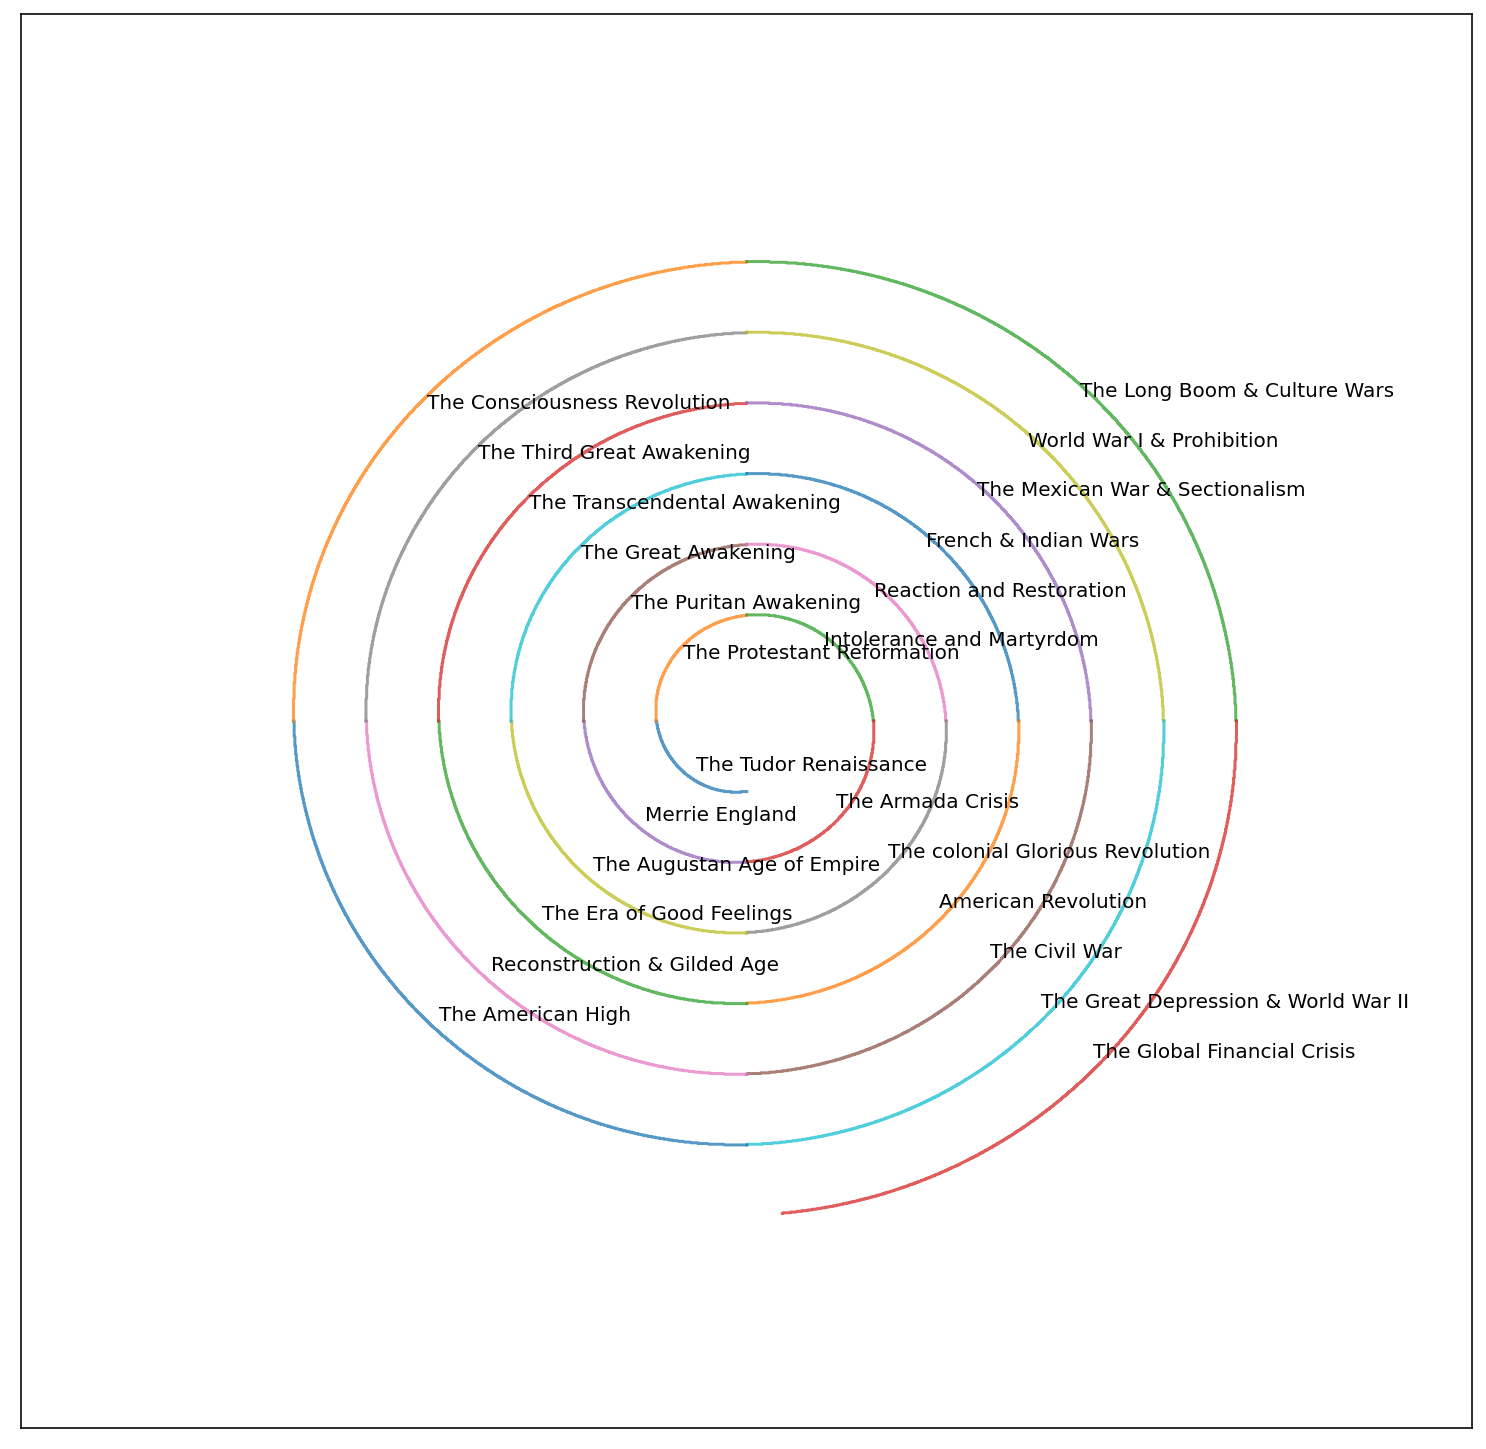

In [13]:

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, autoscale_on=False)
ax.set_xlim(-1000, 1000)
ax.set_ylim(-1000, 1000)
for turning_name, row_series in turnings_df.iterrows():
    start_year = int(row_series['turning_year_begin'])
    stop_year = int(row_series['turning_year_end'])
    is_okay = True
    if start_year > max(ccw_history_year_dict.keys()):
        is_okay = False
    if start_year < min(ccw_history_year_dict.keys()):
        is_okay = False
    if stop_year < min(ccw_history_year_dict.keys()):
        is_okay = False
    if stop_year > max(ccw_history_year_dict.keys()):
        is_okay = False
    if is_okay:
        xy_list = shu.get_one_arc(history_year_dict=ccw_history_year_dict, start_year=start_year, stop_year=stop_year, i=0, verbose=False)
        PathCollection_obj = plt.plot([x[0] for x in xy_list], [y[1] for y in xy_list],
                                      alpha=0.75, label=turning_name)
        #shu.add_spiral_labels([start_year, stop_year], ccw_history_year_dict, 0)
        radius, theta = ccw_history_year_dict[start_year]
        x, y = shu.polar_to_cartesian(radius, theta-45)
        text_obj = plt.text(x, y, turning_name, fontsize=10)
        '''
        shu.label_arc(start_year, stop_year, ccw_history_year_dict, ccw_history_theta_dict,
                  turning_name, 13, 0)
        '''
#Legend_obj = ax.legend()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [14]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [ ]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))